I denna analys av housing information som vi fått till oss i vårt team kommer vi som i ett första steg att genomföra en sk. EDA (Exploratory Data Analysis) som kan ge svar på några av de frågor som vi har samt ge oss en del insikter för vidare analys och inhämtning av ytterligare information om så blir nödvändigt. 


Några frågor/insikter som vi först skulle vilja få svar på i vår analys:
1. Undersöka kvaliten på den data vi har fått till oss
1:1. Vilka datatyper har vi att analysera med?
Svar: All data är flyttal medans sista kolumnen innehåller text/kategorier (exempelvis Near Bay, Near Ocean mfl.). Detta gör att vi kan utföra beräkningar på kolumner som värde, population, inkomst och antal hushåll och då i förhållande till plats. Förväntat här är att 
priserna på husen är högre Near Bay och Near Ocean samt att höginkomstagare är de som också
bor i dessa hushåll. Vi gör först en grov analys för att sedan borr oss vidare in i datat
för att få svar på specifika frågor här nedan.

1:2. Saknas det några värden i housing-data, dvs null-väden
Svar: Ja, kolumnen total_bedrooms innehåller null-värden. 207 rader saknar
värde i denna kolumn. Nedan har jag försökt visualisera detta till geografiska områden.
Vi kan se 2 kluster som tydligt saknar denna information. En slutsats kan vara att just
dessa områden kan vara industrilokaler, affärer osv som saknar sovrum.

Med det sagt, beroende på vilka frågor som man vill få svar på så skulle man kunna komplettera housing-data med saker som närheten till centrum, avstånd till närmaste skola, sjukhus, boyta, tomtstorlek etc. I sådana fall skulle mn kunna dra slutsater kring huspriserna beroende på dessa parametrar. Just nu har vi nästan uteslutande att gå på hur nära husen ligger till havet eller marinan. 



1:3. Finns det någon data som sticker ut?
Svar: Här behöver vi titta på varje kolumn, sortera och granska för att få reda på om 
några värden egentligen inte är representativt för övriga mängden data. Men, om vi tittar
på statistiken från punkt 1:2 ovan där vi t ex kan se medelvärden för inkomst (3.87), huspriser (206855.82), antal sovrum(537) och antal hushåll (499). Utan att veta någon
valuta (troligen dollar eftersom detta ligger i USA) så ligger medianhushållen på runt 2 miljoner dollar. Inkomsten är jag osäker på eftersom
3.87... innebär tusen dollar, troligen är det så. Alltså 3800 dollar i medleinkomst låter ändå relativt rimligt. Hushåll på 499 med antalet sovrum på 537 säger mig att vi har med 
områden att göra och inte specifika hus. Men, om vi räknar ut antalet sovrum per hushåll så får vi lite dryg 1 sovrum per hus i snitt. Vidare analys längre ner så kanske vi kan ta reda på om vissa hushåll har fler sovrum boroende på område, huspris och inkomster.


2. Undersöka om vi kan se några samband i data?
2:1. Kan vi se något samband mellan inkomst och huspriser?
2:2: Hur påverkar åldern på husen priserna?
2:3. Hur påverkas huspriserna av närheten till havet?
2:4. Hur stora är husen, dvs kan vi se generellt hur många rum ett hus har?
2:5. Vad kan kvm priset vara för en viss region?
2:6. Kan vi se antalet sovrum beroende på område och hur ser huspriser och inkomster ut i dessa omården?

In [3]:
#importing necessary libraries that are used throughout the EDA solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [4]:
#Läs först in data set så att vi har något att ställa frågor till
houses = pd.read_csv("housing.csv")

In [5]:
#1. Undersökning av datakvalitet
#1:1. Vilka datatyper har vi att analysera med?
buf = io.StringIO()
houses.info(buf=buf)
text = buf.getvalue()
print(f'Housing info:\n{text}') #Trying to fetch data as a string for formating
print(f'Housing description:\n{houses.describe()}')


#1.2. Saknas det några värden i housing-data, dvs null-väden
print(f'Which columns have null values?:\n{houses.isnull().sum()}')
#So, the column total_bedrooms has 207 null values. Show me the rows with null values
print(f'Rows where total_bedrooms are null:\n{houses[houses["total_bedrooms"].isna()]}')




Housing info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Housing description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
st

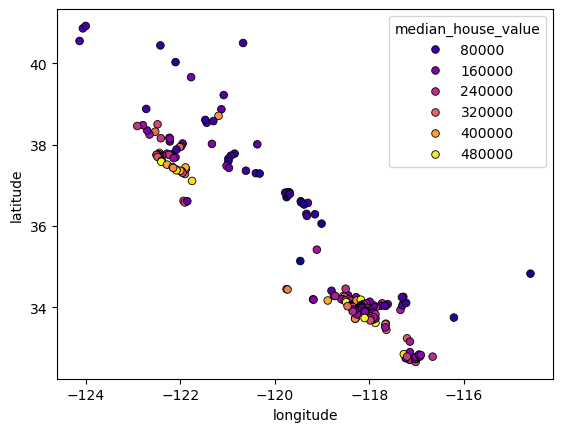

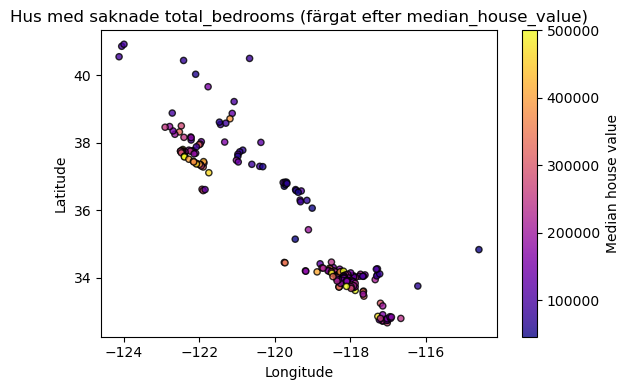

In [6]:
#1.2. Fortsättning...Saknas det några värden i housing-data, dvs null-väden

#Why have these rows null values for total_bedrooms? Can we draw any conlusions or
#is it just bad data with rows that we could delete?

#NOTE: Just trying out seaborn library here in comparison with matplotlib.pyplot down below.
#So, visualizing same data with two different libraries. That being said, with the pyplot version
#you have more control and searborn is more used for quickly visualizing data. You can
#use seaborn in combination with pyplot since seaborn is built around pyplot.

#Try to see if the null values are concentrated to a specific area
cmap = plt.get_cmap("plasma")
sns.scatterplot(data=houses[houses['total_bedrooms'].isnull()],
                x='longitude', y='latitude', hue='median_house_value', 
                legend='auto', palette=cmap, s=30, alpha=1, edgecolor='black',
                linewidth=0.6)
#We can see two clusters which have null values for total bedrooms. 


# Filtrera rader med saknade total_bedrooms
subset = houses[houses['total_bedrooms'].isnull()]

# Skapa scatterplot med färg baserad på median_house_value
fig, ax = plt.subplots(figsize=(6, 4))
sc = ax.scatter(
    subset['longitude'],
    subset['latitude'],
    c=subset['median_house_value'],  # färgvärden
    cmap='plasma',                  # färgpalett
    s=20,                            # punktstorlek
    alpha=0.8,                       # transparens
    edgecolors='black'                # renare look
)

# Lägg till färgbar och etiketter
cbar = fig.colorbar(sc)
cbar.set_label('Median house value')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hus med saknade total_bedrooms (färgat efter median_house_value)')
fig.tight_layout()
#fig.show()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
Number of rows:20640


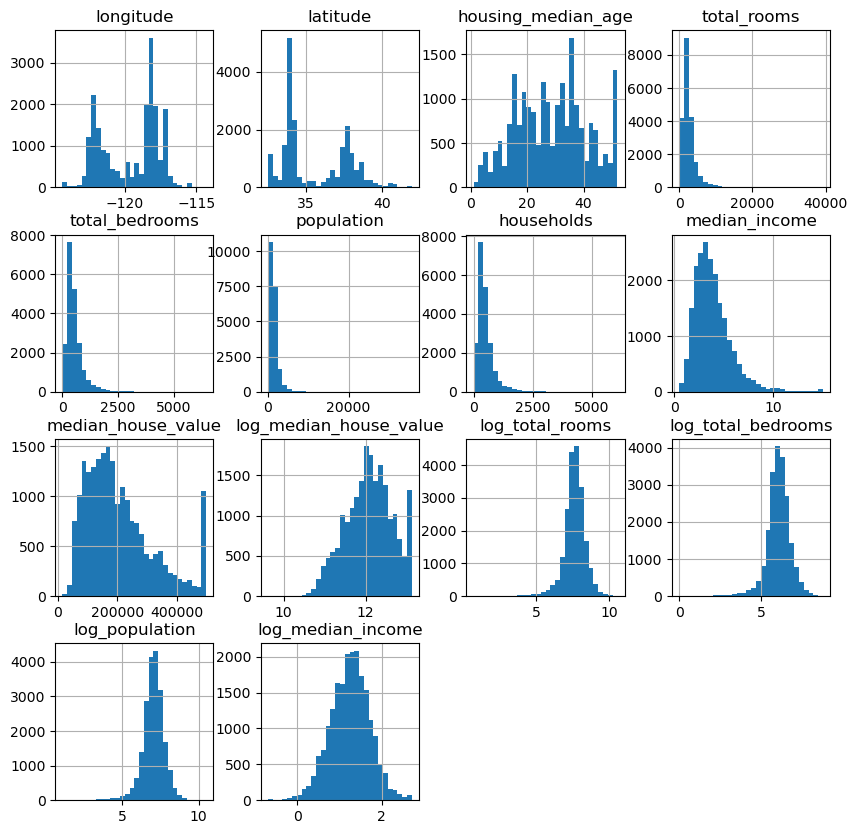

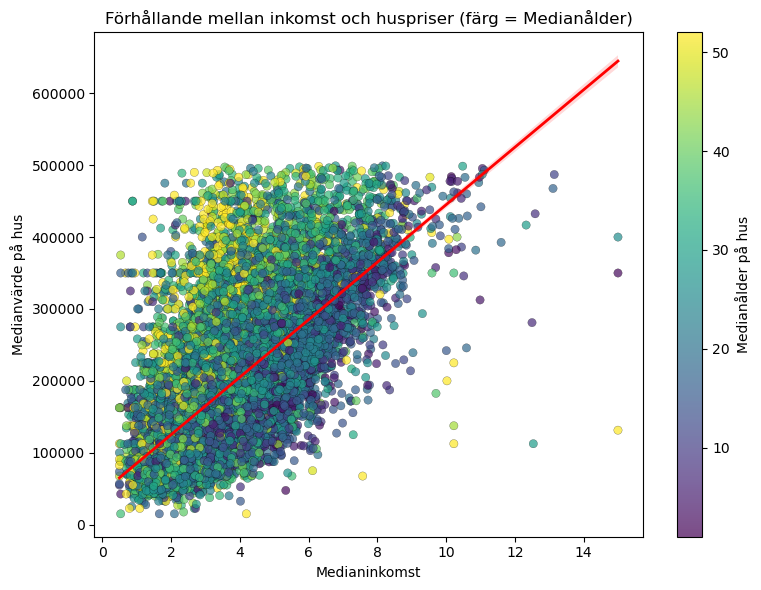

In [ ]:
#2. Undersöka om vi kan se några samband i data?

#See the spread of where houses lies
print(houses["ocean_proximity"].value_counts())

#Create a histogram of our data for analysis
print(f'Number of rows:{houses.shape[0]}')
#houses.hist(figsize=(10,10), bins=30)

# Log-transformering
#Analysis: By log tranforming (taking out extreme values) some or all of the columns which are a bit scewed to the right
#we get a better data for models and visulizations. 
houses['log_median_house_value'] = np.log(houses['median_house_value'])
houses['log_total_rooms'] = np.log(houses['total_rooms'])
houses['log_total_bedrooms'] = np.log(houses['total_bedrooms'])
houses['log_population'] = np.log(houses['population'])
houses['log_median_income'] = np.log(houses['median_income'])
houses.hist(figsize=(10,10), bins=30)

#Remove 207 rows with null values (total_bedrooms for comparison)
#subsetH = houses[houses["total_bedrooms"].notnull()]
#print(f'Number of rows:{subsetH.shape[0]}')
#subsetH.hist(figsize=(10,10), bins=30)
#print(f'Test: {houses['total_bedrooms'].value_counts(dropna=False)}')


#2:1. Kan vi se något samband mellan inkomst och huspriser?

#Filter out extreme values that are not representative
filtered_houses = houses[houses['median_house_value'] < 500000]
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    filtered_houses['median_income'],
    filtered_houses['median_house_value'],
    c=filtered_houses['housing_median_age'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.2
)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Medianålder på hus')

sns.regplot(
    data=filtered_houses,
    x='median_income',
    y='median_house_value',
    scatter=False,
    ax=ax,
    color='red',
    line_kws={'linewidth': 2})


ax.set_xlabel('Medianinkomst')
ax.set_ylabel('Medianvärde på hus')
ax.set_title('Förhållande mellan inkomst och huspriser (färg = Medianålder)')
fig.tight_layout()



#Conclusion: We can se clearly that income is a factor when it comes to house prices.
#Studying the visual plot we can also see a trend line (red) which indicates a trend
#where house prices correlates with the income. We can also see that younger houses
#are owned by those with higher income. However, those older houses are owned
#by those with lower income are also more expensive. The conclusion here could be
#that people has paid of their loans and those houses has gone up in value.
#and that is why they can afford to live in those houses.


